BLIP gives you inspiration to think of undesirable consequences of your own project.
BLIP makes you aware of more undesirable consequences in your research direction/area.
You would use BLIP to browse undesirable consequences of your future projects?
You may add new perspectives to your own research project given the insights from BLIP.
BLIP helps you learn about and consider undesirable consequences for your own projects in your domain?
BLIP would help CS researchers and developers in your area learn about and consider undesirable consequences for their projects.
You may make changes to your own research project given the insights from BLIP.


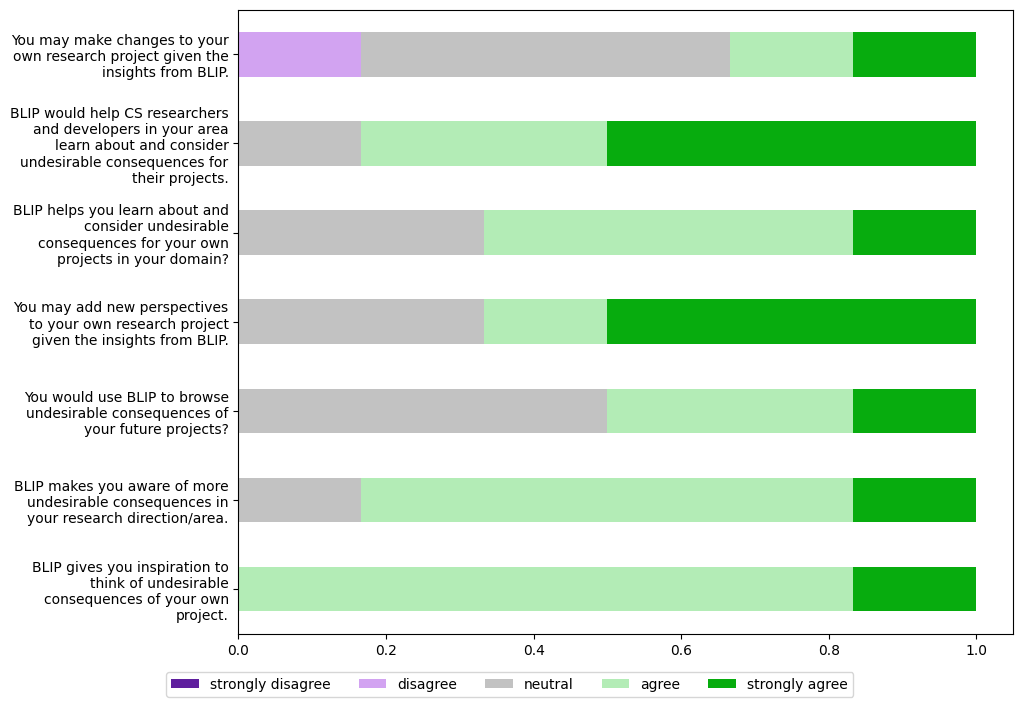

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from matplotlib.patches import Patch


# Read the CSV file
df = pd.read_csv('survey_result.csv')

# drop the last 11 columns and append the final column to the end
df =  df.drop(columns=df.columns.tolist()[7:17])
# temp = df.iloc[:, -1:]

# df[list(temp.columns)[0]] = temp[list(temp.columns)[0]]
df = df.applymap(str.lower) 

# Mapping dictionary
mapping_dict = {
    'very likely': 'strongly agree',
    'likely': 'agree',
    'neutral': 'neutral',
    'unlikely': 'disagree',
    'very unlikely': 'strongly disagree'
}

# Apply the mapping
for column in df:
    df[column] = df[column].map(mapping_dict).fillna(df[column])

# Drop numerical columns
df = df.iloc[:, 1:]
# print(df.columns)
# df = df.iloc[:, [2, 3, 5, 4, 1, 0]]

# Initialize an empty DataFrame to store the normalized counts
normalized_counts = pd.DataFrame()

# Define all possible categories
all_categories = ['strongly agree', 'agree', 'neutral', 'disagree', 'strongly disagree'][::-1]
# all_categories = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'][::-1]

# Loop through each column to calculate the value counts and normalize them
for column in df.columns:
    print(column)
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    
    # Ensure all categories are represented
    for cat in all_categories:
        if cat not in value_counts.index:
            value_counts[cat] = 0
    
    normalized_counts[column] = value_counts / total_count

# Reorder categories
normalized_counts = normalized_counts.reindex(all_categories)

# Fill NaN values with 0 (for plotting)
normalized_counts.fillna(0, inplace=True)

# Create the horizontal stacked bar chart
custom_colors = ['#5f1f9e', '#d2a3f1', '#c2c2c2', '#b3ecb6', '#07ac0e']
ax = normalized_counts.T.plot(kind='barh', stacked=True, figsize=(10, 8), color=custom_colors)


# Wrap the text for y-axis labels
wrapped_labels = [textwrap.fill(label, width=30) for label in normalized_counts.columns]
ax.set_yticklabels(wrapped_labels)

legend_labels = [Patch(facecolor=clr, edgecolor='none', label=cat) for clr, cat in zip(custom_colors, all_categories)]
plt.legend(handles=legend_labels, title='', loc='upper center', bbox_to_anchor=(0.35, -0.05), ncol=5)

plt.subplots_adjust(bottom=0.1)
plt.title
plt.savefig('survey_results_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')


In [41]:
import pandas as pd

# Your data as a dictionary (Replace this with pd.read_csv('your_data.csv') if your data is in a CSV)
df = pd.read_csv('survey_result.csv').iloc[:, 7:17]


# df = pd.DataFrame(data)

# Extract the last 10 columns for SUS questions
# sus_columns = df.columns[-10:]

# remove the second row
# df = df.drop(df.index[1])

# Function to calculate SUS score
def calculate_sus(row):
    sus_score = 0
    for i, question in enumerate(df.columns):
        answer = row[question]
        if (i % 2) == 0:  # Odd questions (0-indexed here, so they're actually even)
            sus_score += answer - 1
        else:  # Even questions
            sus_score += 5 - answer
    return sus_score * 2.5

# Calculate SUS score for each row
df['SUS_Score'] = df.apply(calculate_sus, axis=1)

# Print or save the DataFrame including the SUS scores
average_sus_score = df['SUS_Score'].mean()
print("Average SUS Score:", average_sus_score)

Average SUS Score: 85.83333333333333


In [42]:
df['SUS_Score'].median()

87.5

In [43]:
df['SUS_Score'].std()

4.915960401250875